## API

Today, we'll continue with the dictionaries lecture from last week.
one of the most popular forms of python dictionaries you'll run across as you work is __JSON__ ([JavaScript Object Notation](https://www.json.org/json-en.html)). JSON is the primary format in which data is passed back and forth to APIs ([Application Programming Interface](https://medium.com/@perrysetgo/what-exactly-is-an-api-69f36968a41f)), and most API servers will send their responses in JSON format. Python has great JSON support, with the json package. 

[General list of APIs]('https://github.com/public-apis/public-apis')

#### Simple Example

In [1]:
# import requests and json - needed to make an API call
import requests
import json

In [2]:
# this is the api endpoint to get a JSON 
joke_api_url = 'http://api.icndb.com/jokes/random'

In [3]:
# calling the API with requests
response = requests.get(joke_api_url)
# creating a variable called data to hold the json formatted result
joke_data = response.json()

In [4]:
#print type of response - dict within a dict 
print(type(joke_data))

<class 'dict'>


In [5]:
#json response with joke 
joke_data

{'type': 'success',
 'value': {'id': 81,
  'joke': "Chuck Norris invented his own type of karate. It's called Chuck-Will-Kill.",
  'categories': []}}

In [6]:
# just print 
print(joke_data['value']['joke'])

Chuck Norris invented his own type of karate. It's called Chuck-Will-Kill.


In [7]:
# loop to print 
for key, value in joke_data['value'].items():
    if key == "joke":
         print(value)

Chuck Norris invented his own type of karate. It's called Chuck-Will-Kill.


#### NYT Example

In [8]:
# import requests and json - needed to make an API call
import requests
import json

# import getpass to keep API key hidden 
import getpass

In [14]:
authorized_key = getpass.getpass('API Key:')

API Key:········


TO DO - if you want to play around with the API, please make your own key at https://developer.nytimes.com/get-started






In [15]:
# API url for the most emailed articles over a day, past 7 days or 30 days
# we are getting the results for the past 7 days
#need to pass in a string because you cannot concat string + int 
day = str(7) # this particular API requires you to choose from 1, 7, 30 (past day, 7 days, 30 days)
api_url = "https://api.nytimes.com/svc/mostpopular/v2/emailed/{}.json?api-key={}".format(day, authorized_key)

#print to check 
#print(api_url)



In [16]:
# calling the API with requests
response = requests.get(api_url)
# creating a variable called data to hold the json formatted result
data = response.json()

In [17]:
# show raw data
print(type(data))
data

<class 'dict'>


{'status': 'OK',
 'copyright': 'Copyright (c) 2021 The New York Times Company.  All Rights Reserved.',
 'num_results': 20,
 'results': [{'uri': 'nyt://article/43a0a95d-de8d-50fd-8f4a-7827277c60e8',
   'url': 'https://www.nytimes.com/2021/07/13/well/mind/sleep-insomnia-tips.html',
   'id': 100000007858738,
   'asset_id': 100000007858738,
   'source': 'New York Times',
   'published_date': '2021-07-13',
   'updated': '2021-07-14 09:03:01',
   'section': 'Well',
   'subsection': 'Mind',
   'nytdsection': 'well',
   'adx_keywords': 'Content Type: Service;Sleep;Meditation;Anxiety and Stress;Insomnia;Mobile Applications;Melatonin (Hormone)',
   'column': None,
   'byline': 'By Anahad O’Connor',
   'type': 'Article',
   'title': 'I’m Often Wide Awake at 3 A.M. How Do I Get Back to Sleep?',
   'abstract': 'Sleep experts offer advice on sleeping soundly through the night.',
   'des_facet': ['Content Type: Service',
    'Sleep',
    'Meditation',
    'Anxiety and Stress',
    'Insomnia',
    'Mo

In [18]:
# all the information is stored in the key, 'results'
# results maps to a list of dictionaries that contain the article metadata
# so you will need to use an index number to access the dictionary you want
# the API is constantly updated so you may get different results each time you access it
article = data['results'][0]
article

{'uri': 'nyt://article/43a0a95d-de8d-50fd-8f4a-7827277c60e8',
 'url': 'https://www.nytimes.com/2021/07/13/well/mind/sleep-insomnia-tips.html',
 'id': 100000007858738,
 'asset_id': 100000007858738,
 'source': 'New York Times',
 'published_date': '2021-07-13',
 'updated': '2021-07-14 09:03:01',
 'section': 'Well',
 'subsection': 'Mind',
 'nytdsection': 'well',
 'adx_keywords': 'Content Type: Service;Sleep;Meditation;Anxiety and Stress;Insomnia;Mobile Applications;Melatonin (Hormone)',
 'column': None,
 'byline': 'By Anahad O’Connor',
 'type': 'Article',
 'title': 'I’m Often Wide Awake at 3 A.M. How Do I Get Back to Sleep?',
 'abstract': 'Sleep experts offer advice on sleeping soundly through the night.',
 'des_facet': ['Content Type: Service',
  'Sleep',
  'Meditation',
  'Anxiety and Stress',
  'Insomnia',
  'Mobile Applications',
  'Melatonin (Hormone)'],
 'org_facet': [],
 'per_facet': [],
 'geo_facet': [],
 'media': [{'type': 'image',
   'subtype': 'photo',
   'caption': '',
   'copy

In [19]:
# get url
article['url']

'https://www.nytimes.com/2021/07/13/well/mind/sleep-insomnia-tips.html'

In [20]:
# get title
article['title']

'I’m Often Wide Awake at 3 A.M. How Do I Get Back to Sleep?'

In [21]:
# get byline
article['byline']

'By Anahad O’Connor'

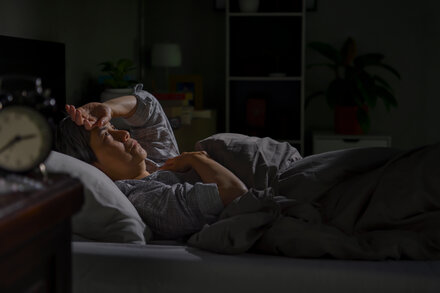

In [22]:
# use IPython & the media metadata to display an image from the returned data
# IPython (Interactive Python) is basically a command shell for interactive computing
# here we are using it to import the display module and Image class so we can see our image within our notebook
from IPython.display import Image

# Image takes three arguments: the image path/url, width, and height
# we are going to fetch all of those data from above like we did for article url, title, and byline
media_meta = article['media'][0]['media-metadata'][2] # this is the same as: data['results'][4]['media'][0]['media-metadata'][2]
url = media_meta['url'] # data['results'][4]['media'][0]['media-metadata'][2]['url']
width = media_meta['width'] # data['results'][4]['media'][0]['media-metadata'][2]['width']
height = media_meta['height'] # data['results'][4]['media'][0]['media-metadata'][2]['height']
Image(url, width=width, height=height) # plug in the correct variables in order